Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

Version | Author
------------ | -------------
0.2 | Björn Hein


License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from IPPerfMonitor import IPPerfMonitor
import IPBasicPRM
import IPVISBasicPRM

import IPVisibilityPRM
import IPVISVisibilityPRM

import IPLazyPRM
import IPVISLazyPRM

import IPRRT
import IPVISRRT

import IPAStar
import IPVISAStar

Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [2]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 200
plannerFactory["basePRM"] = [IPBasicPRM.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


basicConfig2 = dict()
basicConfig2["radius"] = 6
basicConfig2["numNodes"] = 600
plannerFactory["basePRM2"] = [IPBasicPRM.BasicPRM, basicConfig2, IPVISBasicPRM.basicPRMVisualize]

basicConfig3 = dict()
basicConfig3["radius"] = 15
basicConfig3["numNodes"] = 300
plannerFactory["basePRM3"] = [IPBasicPRM.BasicPRM, basicConfig3, IPVISBasicPRM.basicPRMVisualize]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

# lazyConfig = dict()
# lazyConfig["initialRoadmapSize"] = 10
# lazyConfig["updateRoadmapSize"]  = 5 
# lazyConfig["kNearest"] = 8
# lazyConfig["maxIterations"] = 20
# plannerFactory["lazyPRM"] = [IPLazyPRM.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

astarConfig = dict()
astarConfig["heuristic"] = 'euclidean' 
astarConfig["w"]  = 0.5
plannerFactory["astar"] = [IPAStar.AStar, astarConfig, IPVISAStar.aStarVisualize]

astarConfig2 = dict()
astarConfig2["heuristic"] = 'euclidean' 
astarConfig2["w"]  = 0.9
plannerFactory["astar2"] = [IPAStar.AStar, astarConfig2, IPVISAStar.aStarVisualize]


# rrtSimpleConfig = dict()
# rrtSimpleConfig["numberOfGeneratedNodes"] = 100 
# rrtSimpleConfig["testGoalAfterNumberOfNodes"]  = 10
# plannerFactory["simpleRRT"] = [IPRRT.RRTSimple, rrtSimpleConfig, IPVISRRT.rrtPRMVisualize]




In [3]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [4]:
import IPTestSuite as ts
import IPTestSuite_2dRobot as ts_2d
import IPTestSuite_3dRobot as ts_3d
from shapely.geometry import Point, Polygon, LineString
from shapely import plotting


In [5]:
#import importlib
#importlib.reload(IPTestSuiteSS2024)

In [6]:
fullBenchList = ts_2d.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
MyField


In [7]:
# for benchmark in fullBenchList:
#     fig_local = plt.figure(figsize=(7,7))
#     ax = fig_local.add_subplot(1,1,1)
#     title = benchmark.name
#     ax.set_title(title)
#     ax.set_xlim(benchmark.collisionChecker.getEnvironmentLimits()[0])
#     ax.set_ylim(benchmark.collisionChecker.getEnvironmentLimits()[1])
#     plotting.plot_points(Point(benchmark.startList[0]).buffer(.3), color="g", ax=ax)
#     plotting.plot_points(Point(benchmark.goalList[0]).buffer(.3), color="b", ax=ax)
#     #try:
#     benchmark.collisionChecker.drawObstacles(ax)
    
        
#     #except Exception as e:
#     #    print ("Error", e)
#     #    pass

    

In [8]:
resultList = list()
testList = fullBenchList

for key,producer in list(plannerFactory.items()):
    # print(key, producer)
    for benchmark in testList:
        print ("Planning: " + key + " - " + benchmark.name)
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        try:
            
            resultList.append(ResultCollection(key,
                                          planner, 
                                           benchmark, 
                                           planner.planPath(benchmark.startList,benchmark.goalList,producer[1]),
                                           IPPerfMonitor.dataFrame()
                                          ),
                        )
        except Exception as e:
            # throw e
            print ("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR ", e)
            pass
            



Planning: basePRM - Trap
Planning: basePRM - Bottleneck
Planning: basePRM - Fat bottleneck
Planning: basePRM - MyField
Planning: basePRM2 - Trap
Planning: basePRM2 - Bottleneck
Planning: basePRM2 - Fat bottleneck
Planning: basePRM2 - MyField
Planning: basePRM3 - Trap
Planning: basePRM3 - Bottleneck
Planning: basePRM3 - Fat bottleneck
Planning: basePRM3 - MyField
Planning: visibilityPRM - Trap
Planning: visibilityPRM - Bottleneck
Planning: visibilityPRM - Fat bottleneck
Planning: visibilityPRM - MyField
Planning: astar - Trap
Planning: astar - Bottleneck
Planning failed
Planning: astar - Fat bottleneck
Planning failed
Planning: astar - MyField
Planning failed
Planning: astar2 - Trap
Planning: astar2 - Bottleneck
Planning failed
Planning: astar2 - Fat bottleneck
Planning failed
Planning: astar2 - MyField
Planning failed


/Users/glaserpaul/Documents/010_HKA_RKIM/Roboterprogrammierung_Hein/.venv/lib/python3.13/site-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


Error 'NoneType' object is not subscriptable
Error 'NoneType' object is not subscriptable
Error 'NoneType' object is not subscriptable
Error 'NoneType' object is not subscriptable


/var/folders/2s/hdwnmw897sz7w6sdh3ywjg3m0000gn/T/ipykernel_38854/291999975.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig_local = plt.figure(figsize=(10,10))


Error 'NoneType' object is not subscriptable
Error 'NoneType' object is not subscriptable


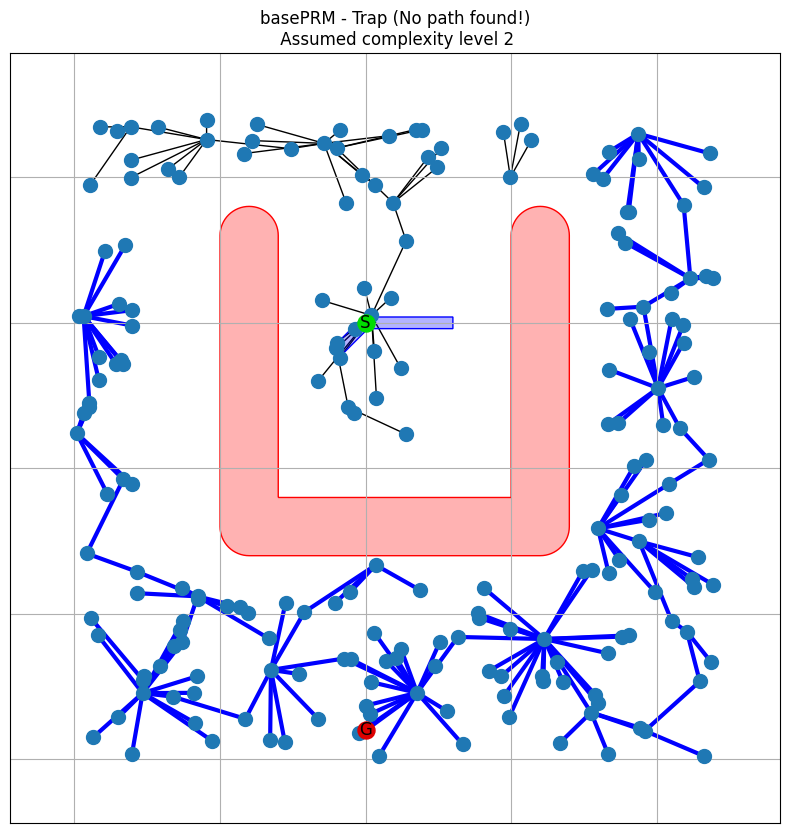

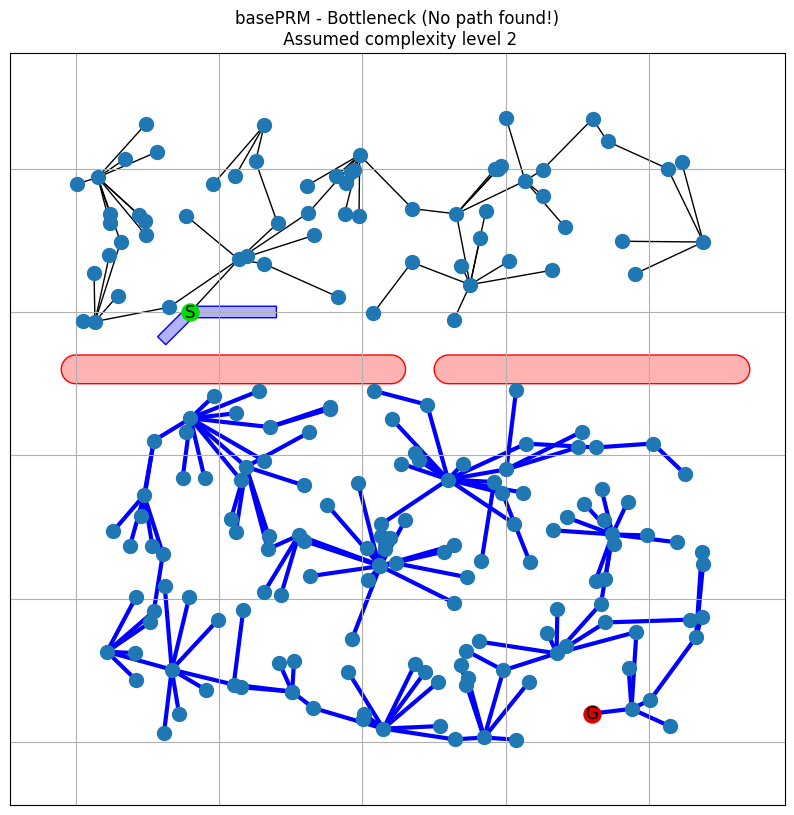

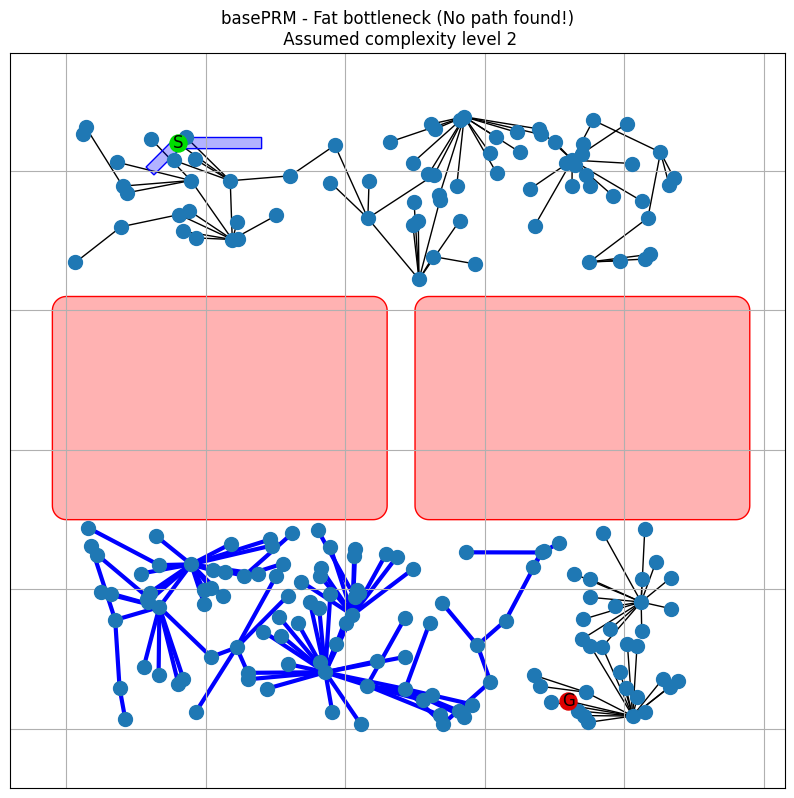

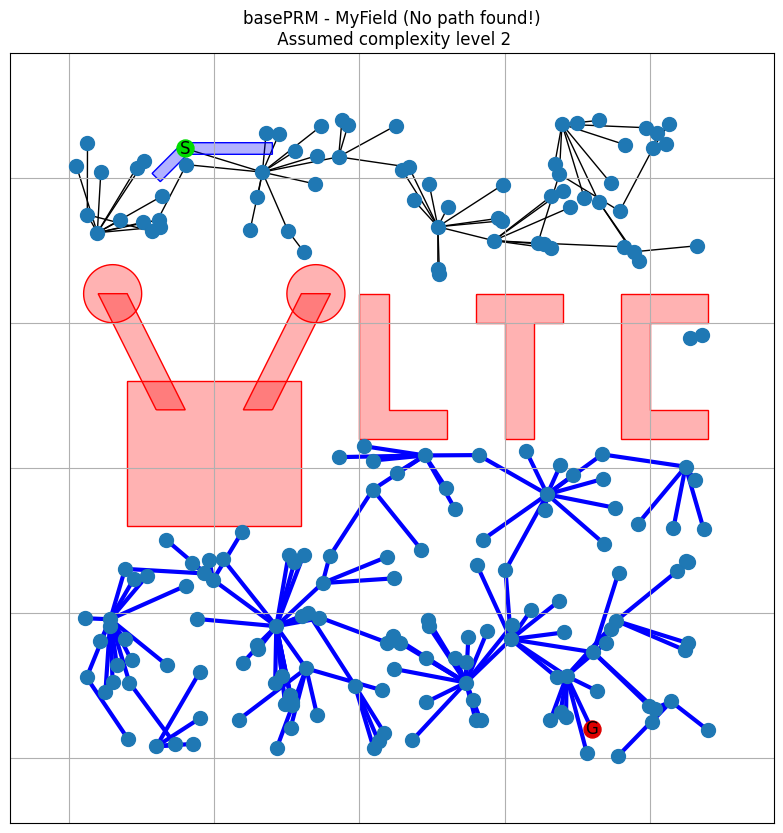

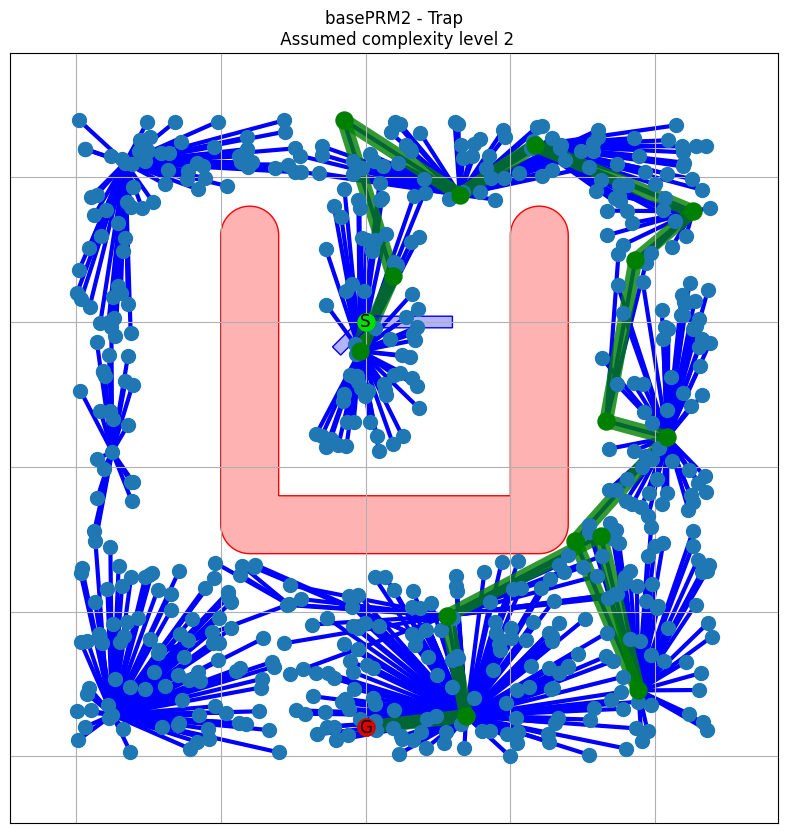

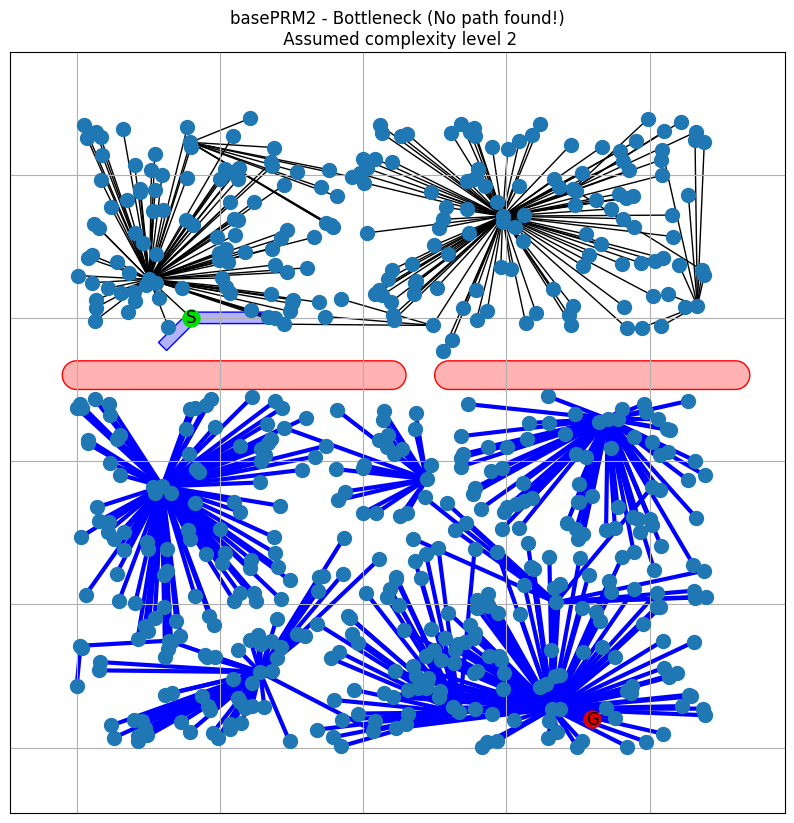

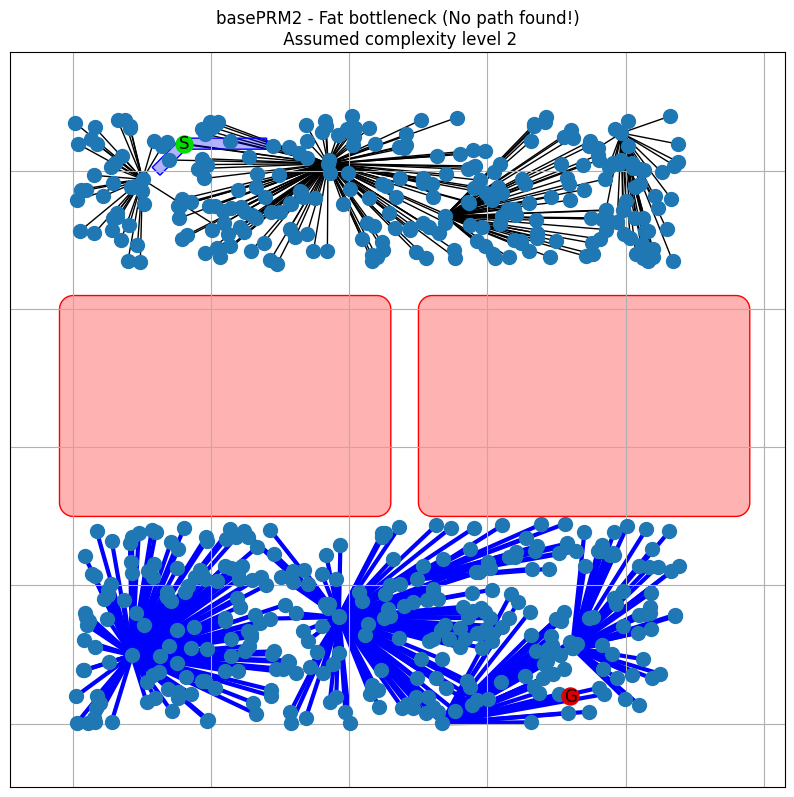

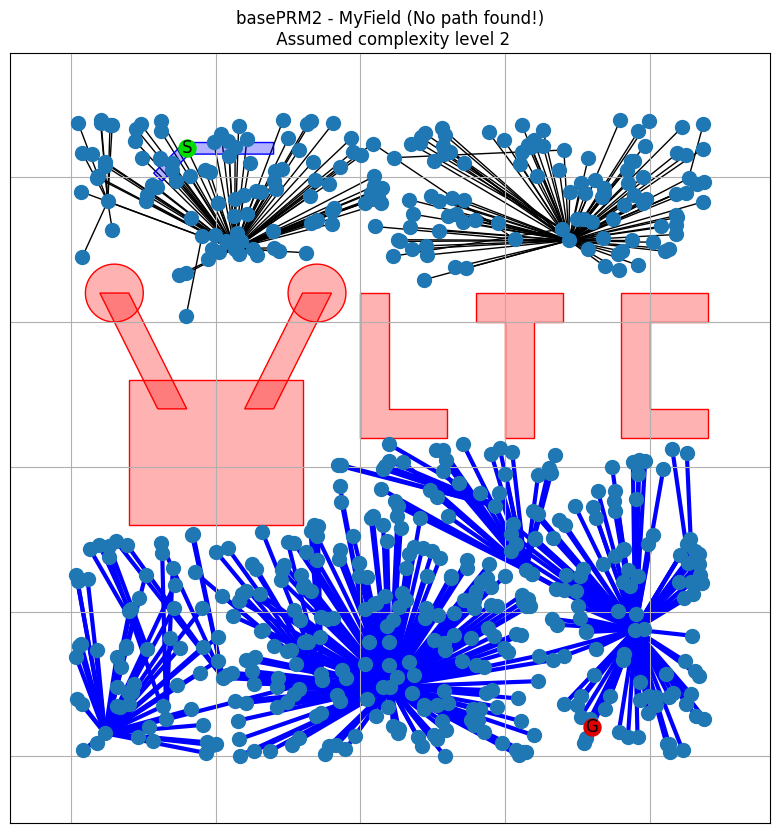

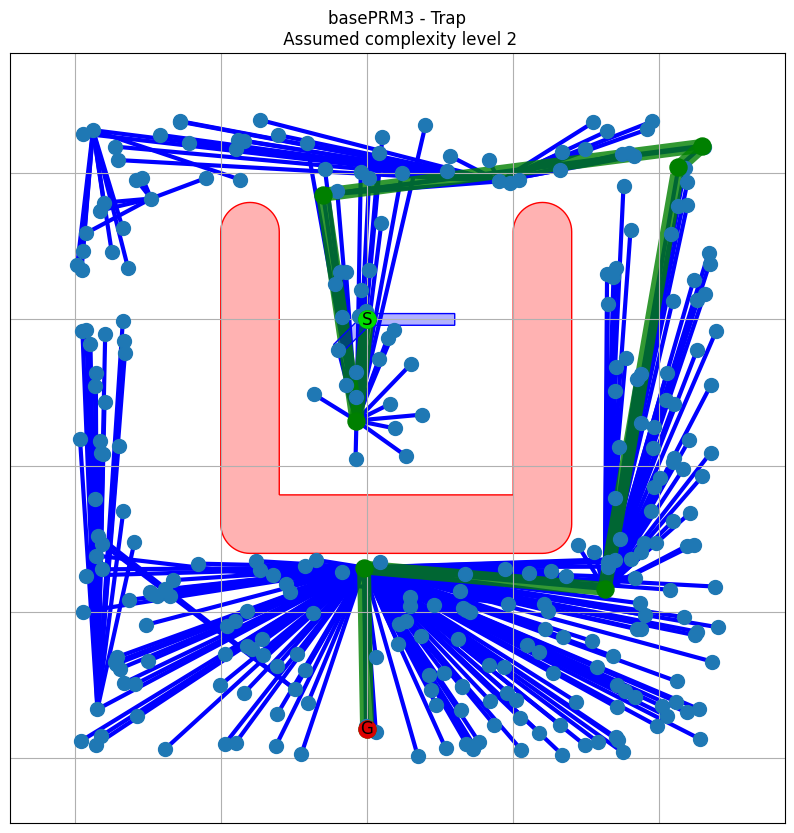

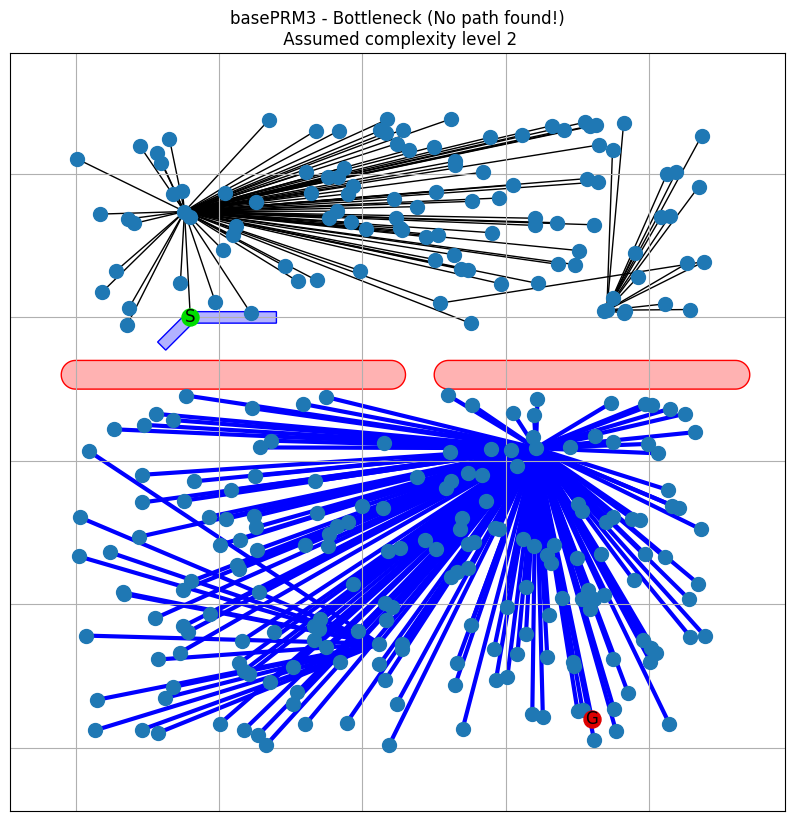

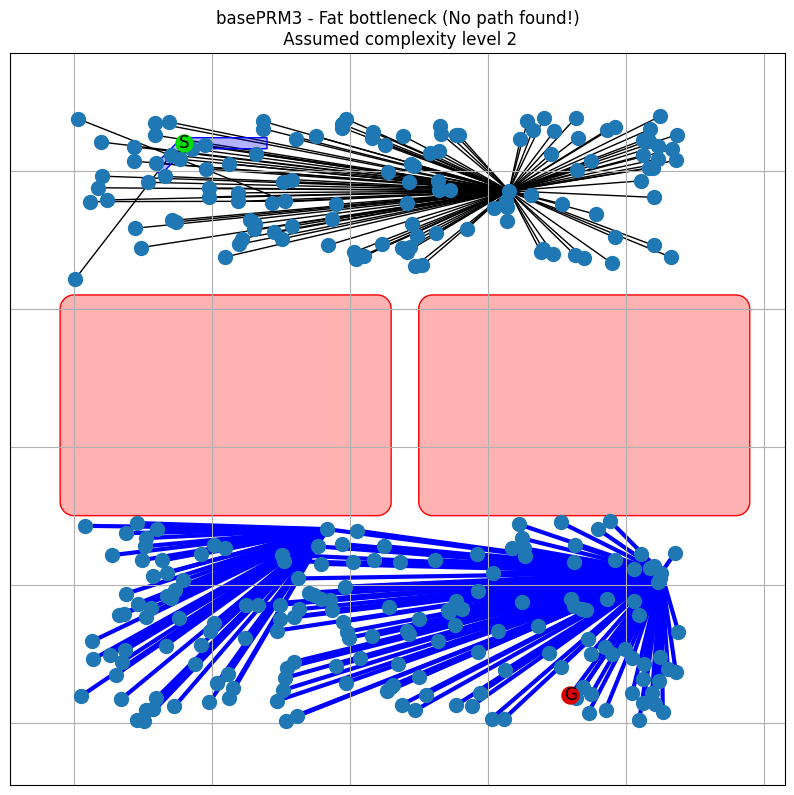

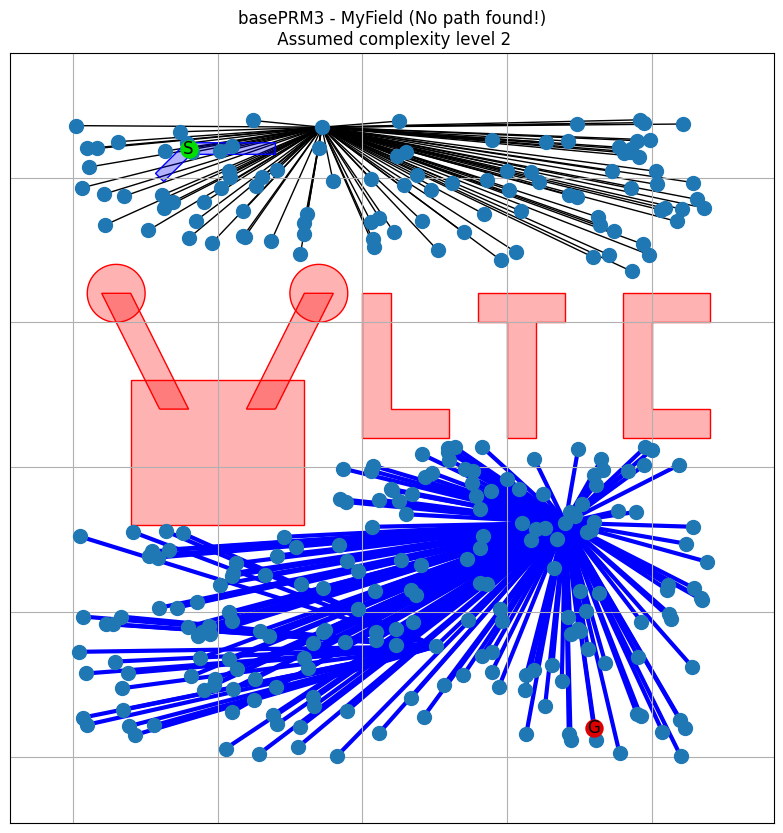

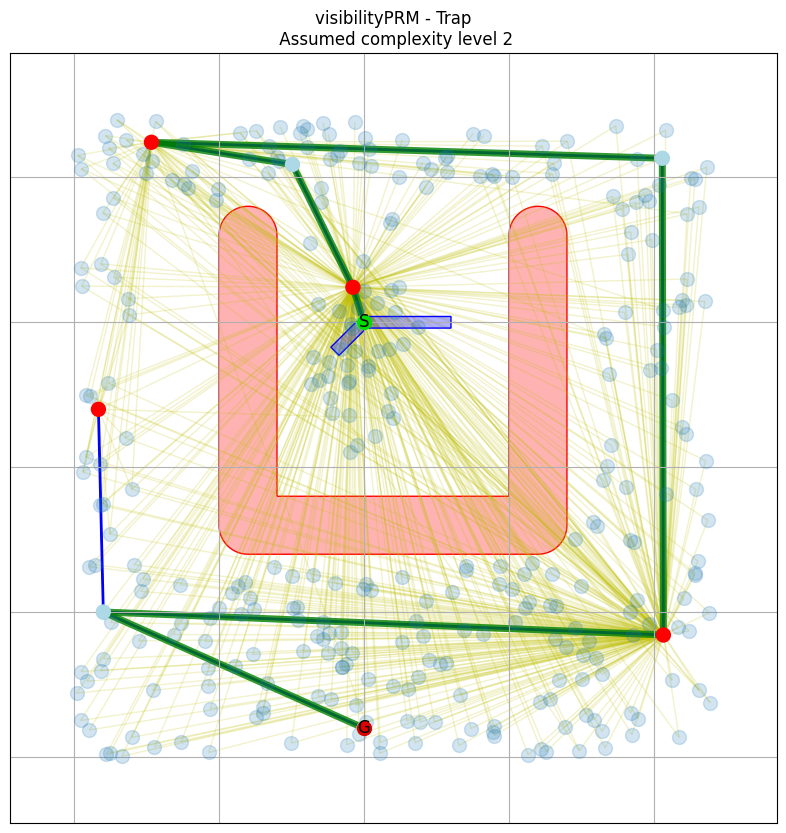

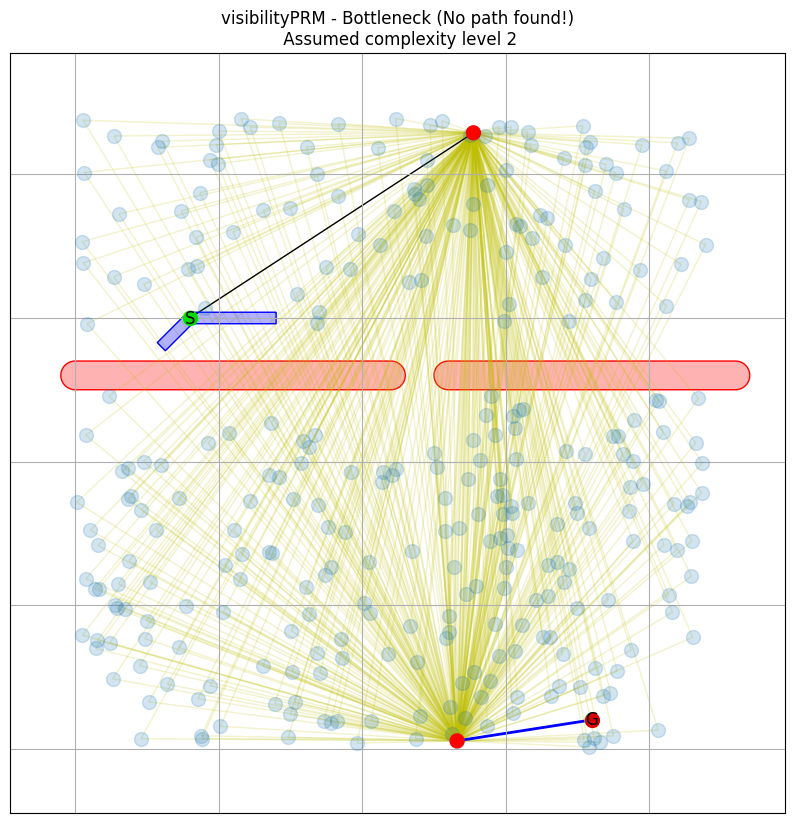

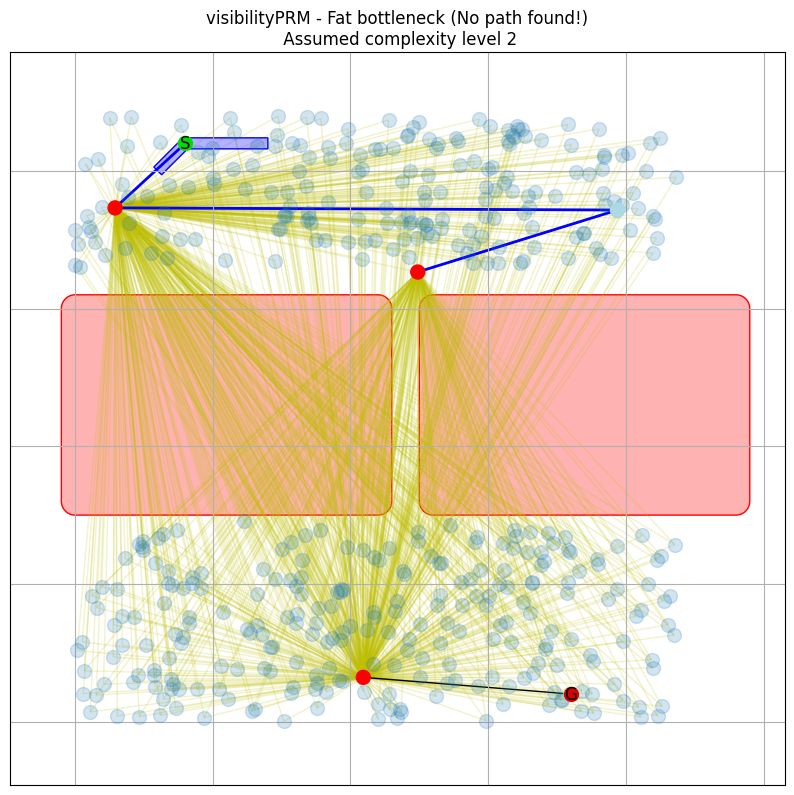

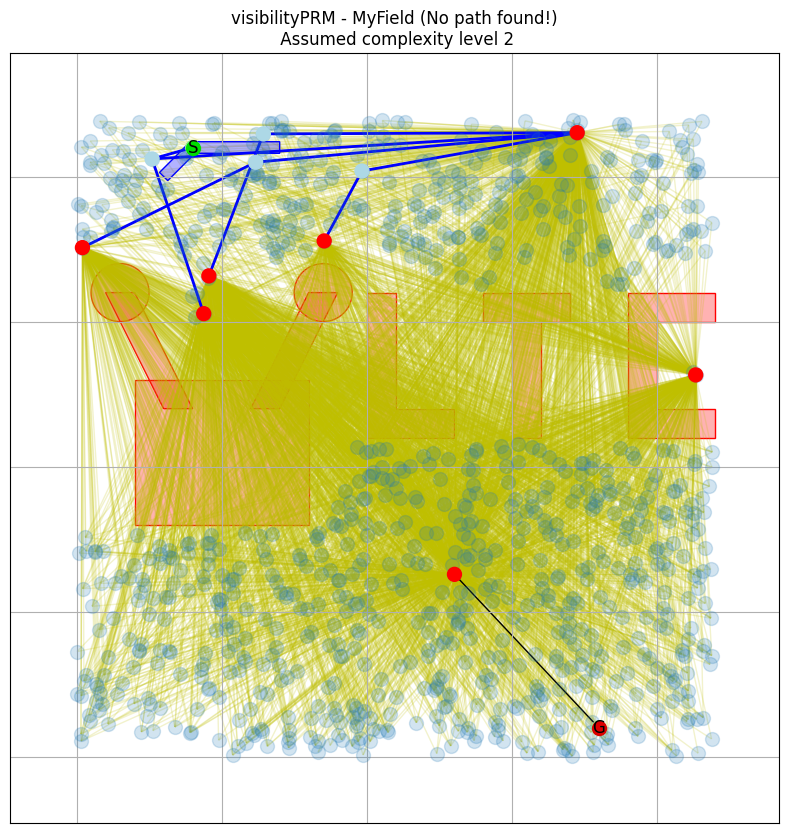

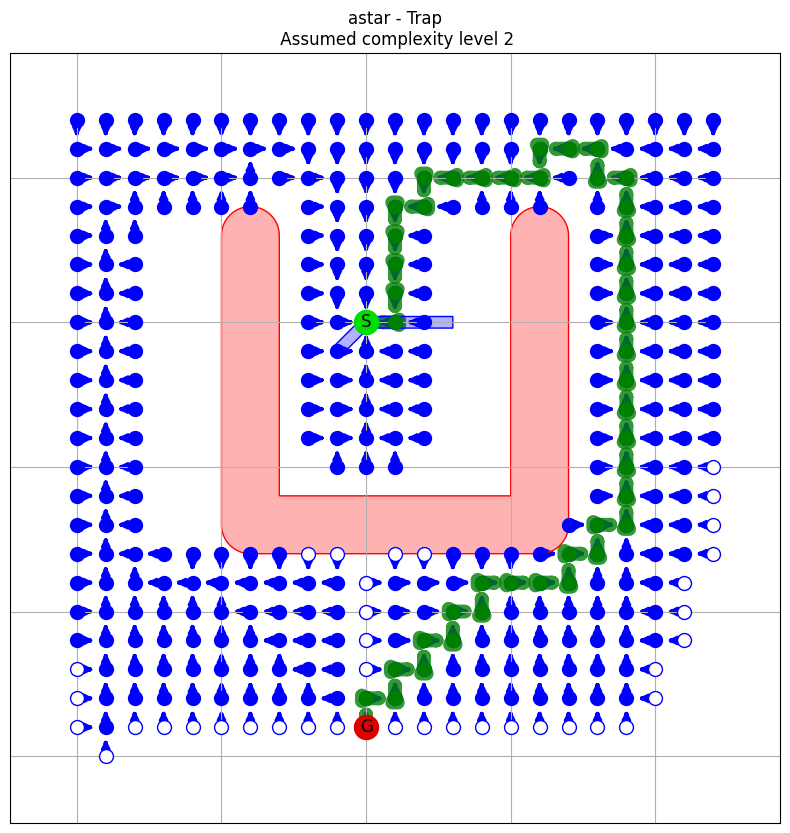

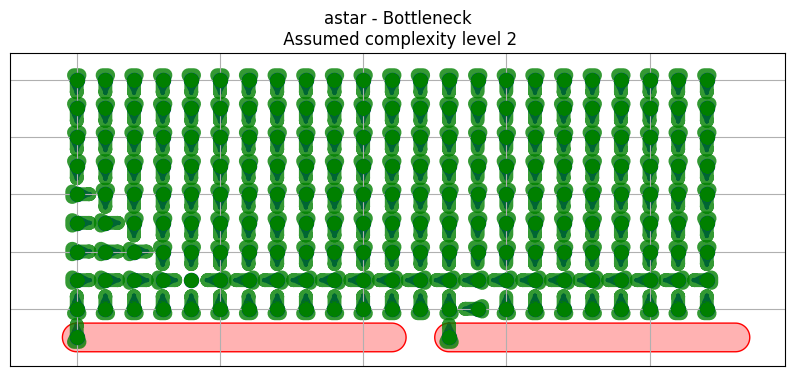

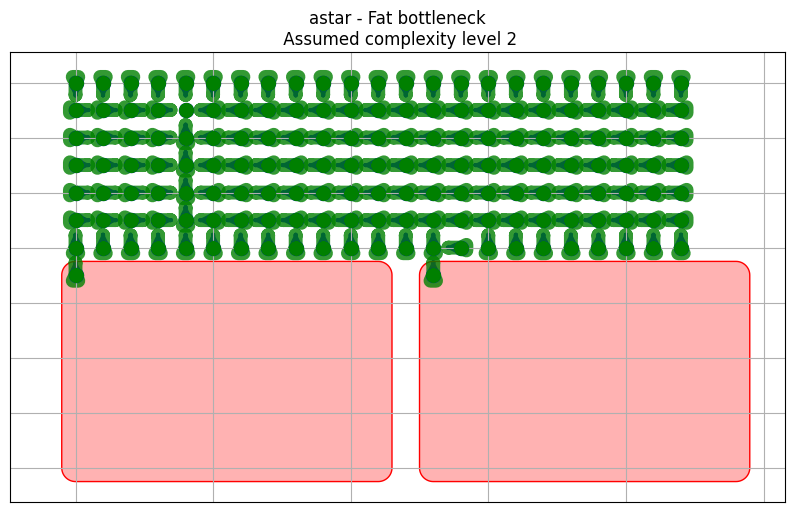

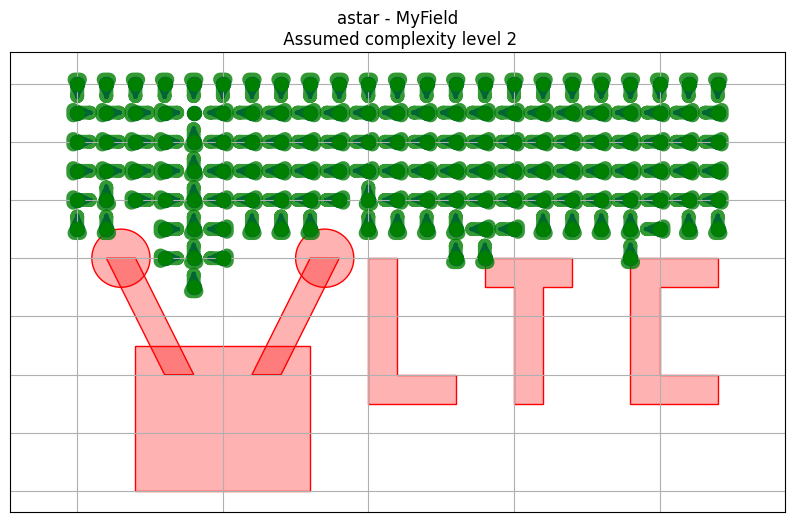

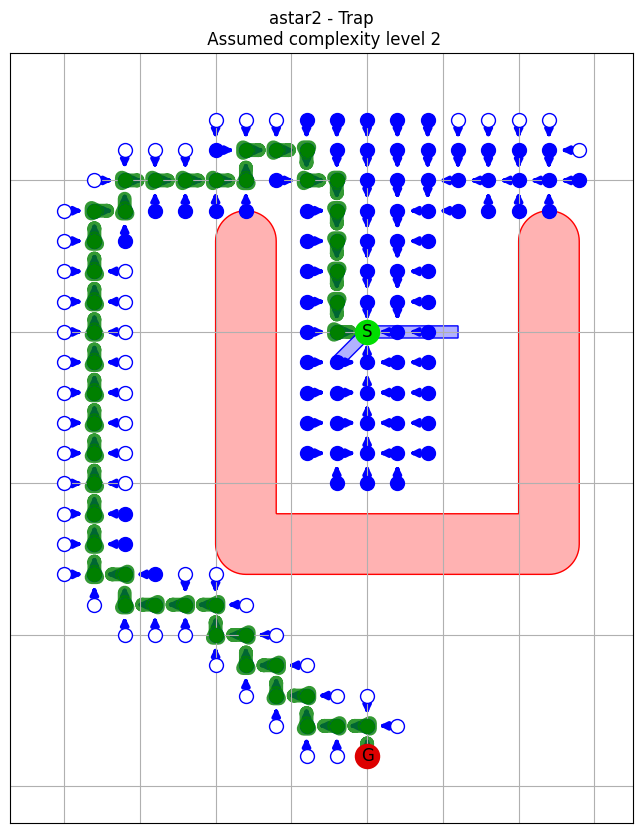

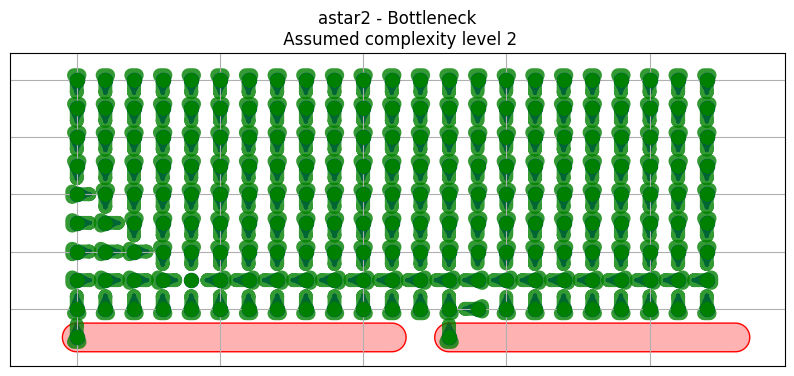

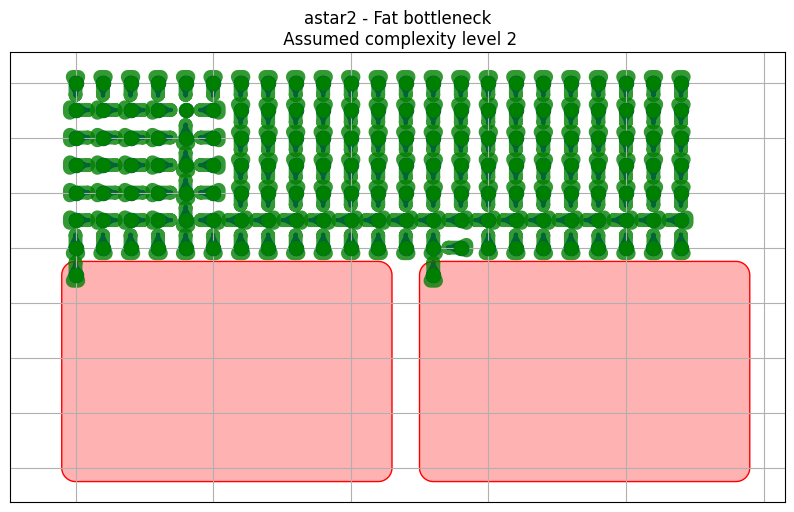

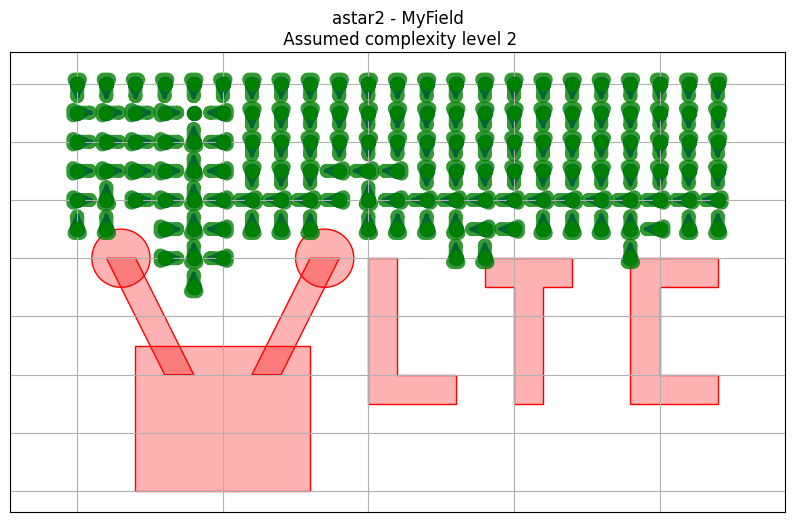

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)
    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
    except Exception as e:
        print ("Error", e)
        pass
    

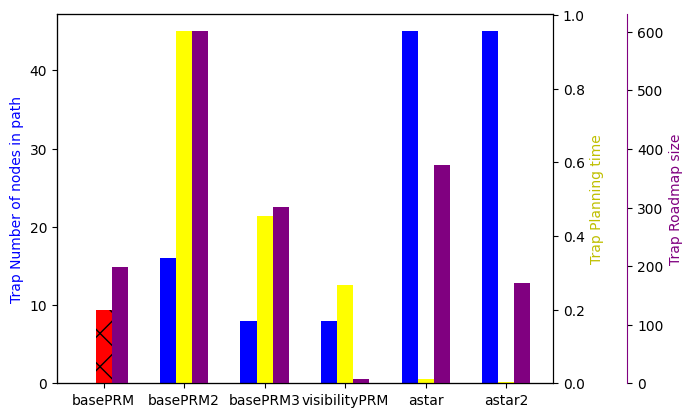

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Number of nodes in path", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    